# Lab 2

## 1. Exploración de los datos

**1. En el fichero datosSAN2018.zip encontrarás un fichero csv para cada día con cada una de las negociaciones que se realizaron, con la fecha, el precio y el volumen negociado.
Carga todos los ficheros y júntalos en un único DataFrame de pandas con el que trabajaremos durante toda la práctica.**

In [25]:
import pandas as pd
import zipfile
import os

# Nombre del archivo ZIP
zip_filename = "/Users/jorgegarcelan/Desktop/UNI/5-MASTER IAA/SC3/IA FINANZAS/IAA-Finance/Labs/Lab 2/data/datosSAN2018.zip"

# Lista para almacenar los DataFrames
dfs = []

try:
    # Extraer los archivos y procesarlos
    with zipfile.ZipFile(zip_filename, 'r') as z:
        # Obtener la lista de archivos dentro del ZIP
        file_list = z.namelist()

        # Iterar sobre cada archivo CSV dentro del ZIP
        for file in file_list:
            if file.endswith(".csv"):  # Asegurar que es un archivo CSV
                with z.open(file) as f:
                    df = pd.read_csv(f)  # Leer el CSV en un DataFrame
                    dfs.append(df)

    # Concatenar todos los DataFrames en uno solo
    df_final = pd.concat(dfs, ignore_index=True)

except zipfile.BadZipFile:
    raise zipfile.BadZipFile("El archivo no es un ZIP válido o está corrupto.")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jorgegarcelan/Desktop/UNI/5-MASTER IAA/SC3/IA FINANZAS/IAA-Finance/Labs/Lab 2/data/datosSAN2018.zip'

In [ ]:
df

,TIME,VOLUMEN,PRECIO
0,2018-09-27 09:00:16.000,11,4.453
1,2018-09-27 09:00:16.000,1,4.453
2,2018-09-27 09:00:16.000,6,4.453
3,2018-09-27 09:00:16.000,10,4.453
4,2018-09-27 09:00:16.000,133,4.453
...,...,...,...
13279,2018-09-27 17:35:11.000,1659,4.481
13280,2018-09-27 17:35:11.000,76775,4.481
13281,2018-09-27 17:35:11.000,1722,4.481
13282,2018-09-27 17:35:11.000,60418,4.481


**2. Usando los datos del apartado anterior calcula las velas (open, high, low, close, vol)
diarias y mensuales.**

In [ ]:
df_final["TIME"] = pd.to_datetime(df_final["TIME"])  # Convertir a datetime
df_final.set_index("TIME", inplace=True)  # Usar la columna de tiempo como índice

def calcular_velas(df, intervalo):
    return df.resample(intervalo).agg({
        "PRECIO": ["first", "last", "max", "min"]
    }).dropna()

# Calcular las velas diarias y mensuales
df_velas_diarias = calcular_velas(df_final, "1D")
df_velas_mensuales = calcular_velas(df_final, "1M")

# Renombrar columnas
df_velas_diarias.columns = ["Open", "Close", "High", "Low"]
df_velas_mensuales.columns = ["Open", "Close", "High", "Low"]

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_37158/13036327.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return df.resample(intervalo).agg({


In [ ]:
df_final

,VOLUMEN,PRECIO
TIME,,
2018-07-25 09:00:30,500,4.749
2018-07-25 09:00:30,13,4.749
2018-07-25 09:00:30,158,4.749
2018-07-25 09:00:30,1,4.749
2018-07-25 09:00:30,73,4.749
...,...,...
2018-09-27 17:35:11,1659,4.481
2018-09-27 17:35:11,76775,4.481
2018-09-27 17:35:11,1722,4.481


In [ ]:
df_velas_diarias

,Open,Close,High,Low
TIME,,,,
2018-01-02,5.5270,5.4540,5.5400,5.4350
2018-01-03,5.4800,5.4550,5.4800,5.4220
2018-01-04,5.4800,5.6380,5.6440,5.4740
2018-01-05,5.6600,5.6750,5.7290,5.6340
2018-01-08,5.6940,5.6920,5.7340,5.6650
...,...,...,...,...
2018-12-21,3.9600,3.9305,3.9955,3.8815
2018-12-24,3.9000,3.8915,3.9275,3.8745
2018-12-27,3.9575,3.8620,3.9600,3.8000


In [ ]:
df_velas_mensuales

,Open,Close,High,Low
TIME,,,,
2018-01-31,5.5270,5.9830,6.0930,5.4220
2018-02-28,6.0600,5.6670,6.0630,5.4060
2018-03-31,5.6400,5.2950,5.6460,5.1350
2018-04-30,5.2600,5.3730,5.5740,5.1050
2018-05-31,5.3590,4.6000,5.5370,4.5385
2018-06-30,4.6840,4.5920,4.8965,4.5000
2018-07-31,4.5320,4.8195,4.8580,4.4535
2018-08-31,4.8260,4.2880,4.8420,4.2555
2018-09-30,4.2875,4.3355,4.6360,4.1400


**3. Haz un gráfico de velas diarias y mensuales.**

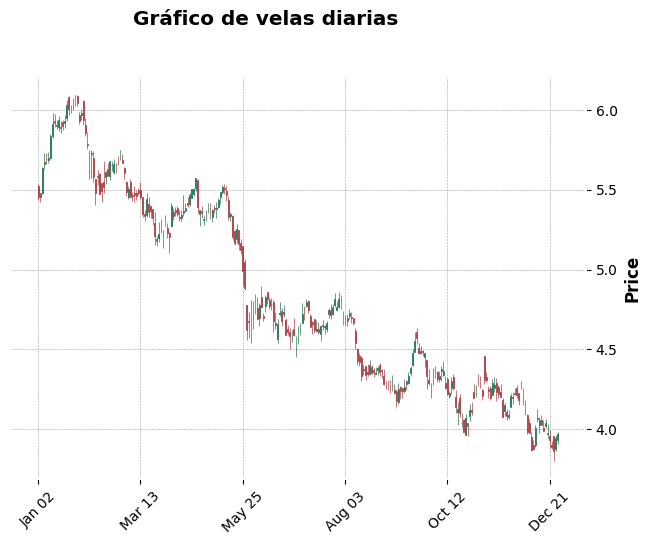

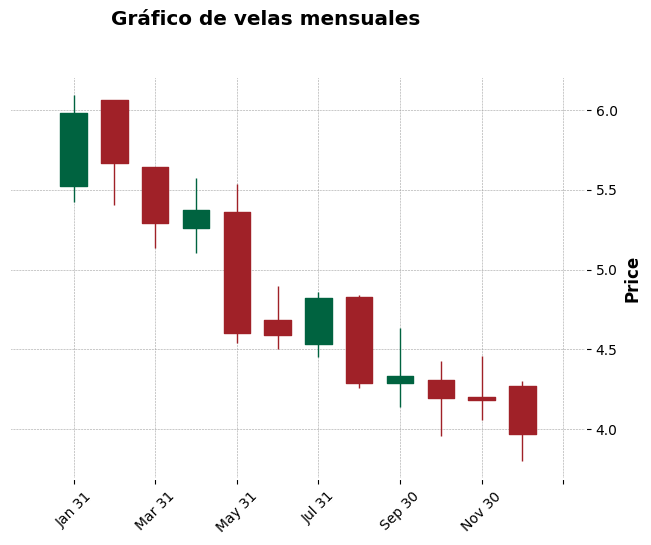

In [ ]:
import mplfinance as mpf

mpf.plot(df_velas_diarias, type='candle', style='charles', title="Gráfico de velas diarias")

mpf.plot(df_velas_mensuales, type='candle', style='charles', title="Gráfico de velas mensuales")

**4. Para un día elegido por ti, calcula el precio ponderado por volumen (VWAP) desde el
inicio del día, en cada instante de tiempo.**

In [ ]:
# Día específico
fecha_elegida = "2018-11-26"

# Filtrar los datos para la fecha elegida
df_dia = df_final[df_final.index.date == pd.to_datetime(fecha_elegida).date()].copy()

# Calcular el precio ponderado por volumen (VWAP)
df_dia["CUM_VOL"] = df_dia["VOLUMEN"].cumsum()
df_dia["CUM_PRECIO_VOL"] = (df_dia["PRECIO"] * df_dia["VOLUMEN"]).cumsum()
df_dia["VWAP"] = df_dia["CUM_PRECIO_VOL"] / df_dia["CUM_VOL"]
df_dia


,VOLUMEN,PRECIO,CUM_VOL,CUM_PRECIO_VOL,VWAP
TIME,,,,,
2018-11-26 09:00:08,140,4.1425,140,5.799500e+02,4.142500
2018-11-26 09:00:08,100,4.1425,240,9.942000e+02,4.142500
2018-11-26 09:00:08,760,4.1425,1000,4.142500e+03,4.142500
2018-11-26 09:00:08,500,4.1425,1500,6.213750e+03,4.142500
2018-11-26 09:00:08,1223,4.1425,2723,1.128003e+04,4.142500
...,...,...,...,...,...
2018-11-26 17:35:02,1833,4.2055,36267679,1.523335e+08,4.200255
2018-11-26 17:35:02,6240,4.2055,36273919,1.523598e+08,4.200256
2018-11-26 17:35:02,36951,4.2055,36310870,1.525152e+08,4.200262


**5. Obtén una gráfico parecido a la Figura 1: donde puedas ver las negociaciones, el VWAP
y volumen acumulado a lo largo del día. ¿Qué conclusiones puedes extraer?**

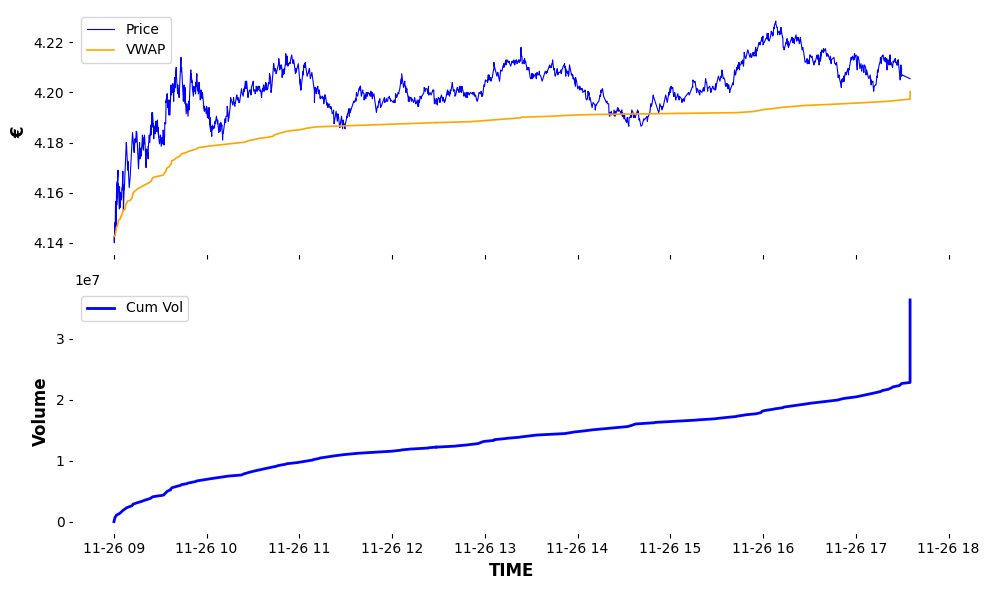

In [ ]:
import matplotlib.pyplot as plt

# Crear la figura y los subgráficos
fig, ax1 = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Gráfico superior: Precio y VWAP
ax1[0].plot(df_dia.index, df_dia["PRECIO"], label="Price", color="blue", linewidth=0.8)
ax1[0].plot(df_dia.index, df_dia["VWAP"], label="VWAP", color="orange", linewidth=1.2)
ax1[0].set_ylabel("€")
ax1[0].legend()
ax1[0].grid()

# Gráfico inferior: Volumen acumulado
ax1[1].plot(df_dia.index, df_dia["CUM_VOL"], label="Cum Vol", color="blue")
ax1[1].set_ylabel("Volume")
ax1[1].set_xlabel("TIME")
ax1[1].legend()
ax1[1].grid()

# Mostrar la figura
plt.tight_layout()
plt.show()


El gráfico muestra que el precio comienza subiendo, con fluctuaciones a lo largo del día y un periodo en el que el precio se estabiliza de 11:30 a 13:00. Esto sugiere que las transacciones ocurren de manera distribuida sin grandes desviaciones del valor promedio ponderado por volumen.

Durante la mañana, el precio está por encima del VWAP, sugiriendo un mercado alcista. Sin embargo, sobre las 14:30 hasta las 15:00 aproximadamente el precio está por debajo del VWAP, indicando posibles oportunidades de compra. El volumen acumulado aumenta de forma constante, con un pico al final del día, lo que sugiere mayor actividad de negociación en el cierre del mercado. Esto indica que muchos inversores ajustan sus posiciones al final del día.

## 2. Cálculo y estimación del volumen diario

**1. Calcula para cada día el volumen negociado en intervalos de 30 minutos. Normalizaremos esta curva con el volumen total diario para obtener un porcentaje por cada intervalo. Realiza un gráfico para un día en concreto, obtendrás algo parecido a la Figura 2.**

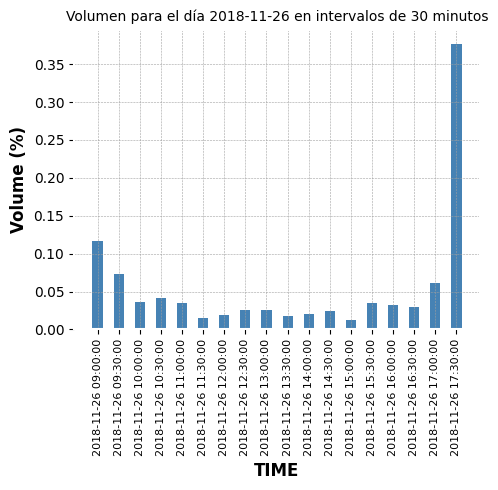

In [ ]:
# Agrupar el volumen en intervalos de 30 minutos
df_volumen_30m = df_final.resample("30min")["VOLUMEN"].sum()

# Normalizar dividiendo por el volumen total diario
df_volumen_30m /= df_volumen_30m.groupby(df_volumen_30m.index.date).transform("sum")

# Elegir un día específico
fecha_elegida = "2018-11-26"

# Filtrar los datos para la fecha elegida
df_dia = df_volumen_30m[df_volumen_30m.index.date == pd.to_datetime(fecha_elegida).date()].copy()

# **Eliminar los valores donde el volumen sea 0**
df_dia_plot = df_dia[df_dia > 0]

# Crear el gráfico con formato similar al que subiste
plt.figure(figsize=(5, 5))  # Formato más cuadrado
plt.bar(df_dia_plot.index, df_dia_plot, width=0.01, color="steelblue")  # Ajustar el ancho de las barras

# Formatear el eje X con todas las horas
plt.xticks(df_dia_plot.index, [t.strftime('%Y-%m-%d %H:%M:%S') for t in df_dia_plot.index], rotation=90, fontsize=8)

# Formato del gráfico
plt.xlabel("TIME")
plt.ylabel("Volume (%)")
plt.title(f"Volumen para el día {fecha_elegida} en intervalos de 30 minutos", fontsize=10)

# Mejorar los márgenes y layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**2. Calcula el volumen medio diario por intervalos de 30 minutos de todo el año, ¿qué conclusiones puedes extraer?**

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_37158/3152495282.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_volumen_30m = df_final.resample("30T")["VOLUMEN"].sum()


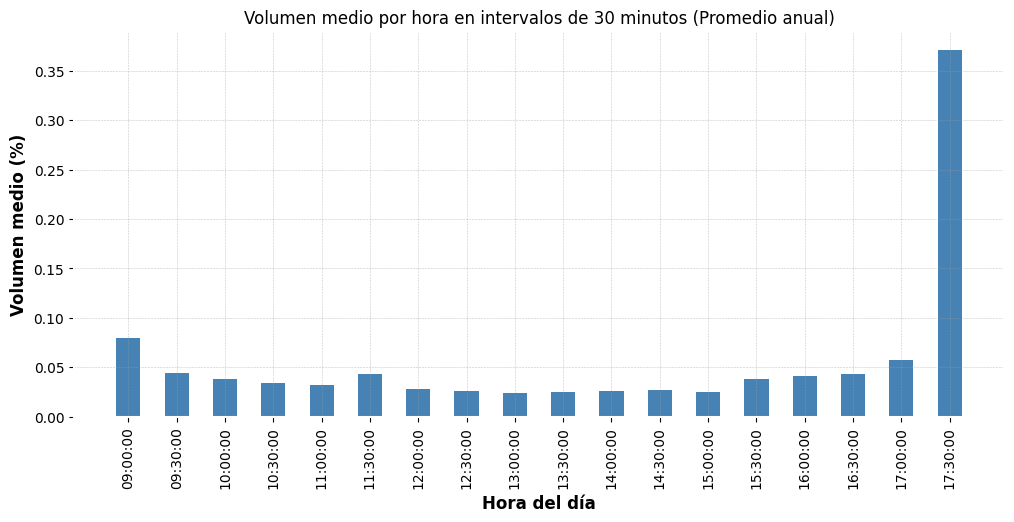

In [ ]:
# Agrupar el volumen en intervalos de 30 minutos y calcular la suma en cada intervalo
df_volumen_30m = df_final.resample("30T")["VOLUMEN"].sum()

# Normalizar dividiendo por el volumen total diario
df_volumen_30m /= df_volumen_30m.groupby(df_volumen_30m.index.date).transform("sum")

# Calcular la media para cada intervalo de 30 minutos sin crear una columna extra
volumen_30m_hora_porc = df_volumen_30m.groupby(df_volumen_30m.index.time).mean()

# **Eliminar los valores donde el volumen sea 0**
volumen_30m_hora_porc = volumen_30m_hora_porc[volumen_30m_hora_porc > 0]

# Crear el gráfico
plt.figure(figsize=(12, 5))
plt.bar(range(len(volumen_30m_hora_porc)), volumen_30m_hora_porc.values, width=0.5, color="steelblue")

# Ajustar etiquetas del eje X para mostrar bien las horas
plt.xticks(ticks=range(0, len(volumen_30m_hora_porc)), 
           labels=[t.strftime('%H:%M:%S') for i, t in enumerate(volumen_30m_hora_porc.index)], 
           rotation=90)

# Formato del gráfico
plt.xlabel("Hora del día")
plt.ylabel("Volumen medio (%)")
plt.title("Volumen medio por hora en intervalos de 30 minutos (Promedio anual)")
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar el gráfico
plt.show()


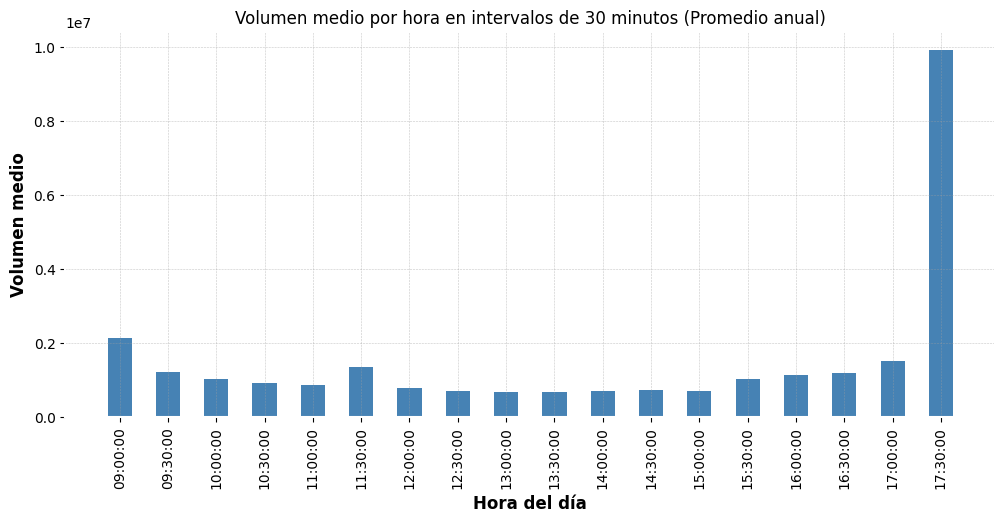

In [ ]:
# Agrupar el volumen en intervalos de 30 minutos y calcular la suma en cada intervalo
df_volumen = df_final.resample("30min")["VOLUMEN"].sum()

# Calcular la media para cada intervalo de 30 minutos sin crear una columna extra
volumen_30m_medio_hora = df_volumen.groupby(df_volumen.index.time).mean()

# **Eliminar los valores donde el volumen sea 0**
volumen_30m_medio_hora = volumen_30m_medio_hora[volumen_30m_medio_hora > 0]

# Crear el gráfico
plt.figure(figsize=(12, 5))
plt.bar(range(len(volumen_30m_medio_hora)), volumen_30m_medio_hora.values, width=0.5, color="steelblue")

# Ajustar etiquetas del eje X para mostrar bien las horas
plt.xticks(ticks=range(0, len(volumen_30m_medio_hora)), 
           labels=[t.strftime('%H:%M:%S') for i, t in enumerate(volumen_30m_medio_hora.index)], 
           rotation=90)

# Formato del gráfico
plt.xlabel("Hora del día")
plt.ylabel("Volumen medio")
plt.title("Volumen medio por hora en intervalos de 30 minutos (Promedio anual)")
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar el gráfico
plt.show()

Podemos observar un gráfico similar en forma al anterior, con un pico significativo en la primera media hora (09:00) y un aumento drástico en el último intervalo (17:30). Esto sugiere una alta actividad al inicio y cierre del mercado, probablemente debido a órdenes acumuladas y ajustes de carteras (subastas de apertura y cierre).

Por otro lado, Entre las 10:00 y las 16:30, el volumen se mantiene relativamente estable con pequeñas fluctuaciones, lo que indica un flujo continuo de transacciones sin grandes movimientos abruptos. 

En relación al pequeño aumento del volumen a las 11:30, se pueden plantear las siguientes posibles explicaciones: 
- Muchas estadísticas económicas relevantes (como el IPC, datos de empleo o PIB) suelen publicarse alrededor de media mañana, especialmente en Europa. [Fuente](https://www.bde.es/webbe/es/estadisticas/calendario/calendario-difusion-estadisticas.html)
- Antes del mediodía, algunos inversores y traders pueden querer asegurar posiciones, lo que genera un aumento de actividad.

**3. Realiza un modelo de regresión donde se estime para cada día el porcentaje de volumen de cada intervalo. Se tendrán en cuenta los siguientes puntos:**

#### Primer modelo (Volumen últimos 5 días)

Como primera aproximación hemos implementado un modelo de regresión logística para estimar el porcentaje de volumen en cada intervalo, utilizando como características la evolución del volumen en los últimos cinco días. La elección de este modelo se debe a su simplicidad y facilidad de interpretación, lo que nos permite obtener una línea base antes de explorar enfoques más complejos.

Dado que trabajamos con series temporales, hemos realizado una división cronológica de los datos en conjuntos de entrenamiento y prueba. Este enfoque garantiza que el modelo se entrene con datos anteriores y se evalúe con datos futuros, evitando fugas de información.

Para evaluar el desempeño del modelo y compararlo con otros, hemos utilizado las métricas MAE (Error Absoluto Medio) y MSE (Error Cuadrático Medio):

- MAE mide el error medio absoluto entre las predicciones y los valores reales, proporcionando una métrica fácil de interpretar en términos de unidades de volumen.
- MSE penaliza errores grandes debido a la elevación al cuadrado de las diferencias, siendo útil cuando queremos enfatizar desviaciones significativas en las predicciones.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Mantener la fecha como columna para luego pivotear
df_volumen = df_volumen.reset_index()
df_volumen["fecha"] = df_volumen["TIME"].dt.date  # Extraer la fecha
df_volumen["hora"] = df_volumen["TIME"].dt.time  # Extraer la hora

# Pivotear los datos para que cada fila sea un día y las columnas sean los intervalos de 30 minutos
df_volumen_pivot = df_volumen.pivot(index="fecha", columns="hora", values="VOLUMEN")

# Normalizar por el volumen total diario
df_volumen_pivot = df_volumen_pivot.div(df_volumen_pivot.sum(axis=1), axis=0)


In [ ]:
# Convertir las etiquetas de las columnas a cadenas de texto en formato 'HH:MM:SS'
df_volumen_pivot.columns = [col.strftime('%H:%M:%S') for col in df_volumen_pivot.columns]

# Filtrar las columnas (horas) desde las 09:00:00 hasta las 17:30:00
df_volumen_pivot = df_volumen_pivot.loc[:, '09:00:00':'17:30:00']

# Mostrar las primeras filas del DataFrame filtrado
#df_volumen_pivot

,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00
fecha,,,,,,,,,,,,,,,,,,
2018-01-02,0.085968,0.054624,0.047574,0.095950,0.043250,0.027563,0.032198,0.027694,0.023650,0.024478,0.025658,0.025852,0.026526,0.035058,0.043921,0.026844,0.064639,0.288555
2018-01-03,0.082028,0.044532,0.030307,0.037557,0.033703,0.035042,0.029274,0.030403,0.018098,0.024383,0.029424,0.034491,0.032597,0.038943,0.061266,0.080573,0.058967,0.298413
2018-01-04,0.051438,0.040564,0.058130,0.045478,0.023451,0.024406,0.025551,0.015434,0.032377,0.016236,0.041181,0.026439,0.022235,0.027681,0.035240,0.065258,0.106136,0.342766
2018-01-05,0.099842,0.058559,0.159463,0.057255,0.038026,0.063705,0.030521,0.018886,0.037588,0.013306,0.010468,0.015820,0.019185,0.024900,0.041730,0.025650,0.042106,0.242992
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,0.084350,0.030858,0.040930,0.024178,0.032980,0.028057,0.018701,0.025896,0.028332,0.019155,0.047835,0.047825,0.032615,0.028952,0.050740,0.072600,0.061988,0.324010
2018-12-28,0.076017,0.052703,0.039680,0.059999,0.056353,0.065996,0.042602,0.046879,0.031021,0.024253,0.032290,0.022089,0.015721,0.040220,0.038851,0.035659,0.053867,0.265802
2018-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_volumen_pivot.dropna(inplace=True)
#df_volumen_pivot

,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00
fecha,,,,,,,,,,,,,,,,,,
2018-01-02,0.085968,0.054624,0.047574,0.095950,0.043250,0.027563,0.032198,0.027694,0.023650,0.024478,0.025658,0.025852,0.026526,0.035058,0.043921,0.026844,0.064639,0.288555
2018-01-03,0.082028,0.044532,0.030307,0.037557,0.033703,0.035042,0.029274,0.030403,0.018098,0.024383,0.029424,0.034491,0.032597,0.038943,0.061266,0.080573,0.058967,0.298413
2018-01-04,0.051438,0.040564,0.058130,0.045478,0.023451,0.024406,0.025551,0.015434,0.032377,0.016236,0.041181,0.026439,0.022235,0.027681,0.035240,0.065258,0.106136,0.342766
2018-01-05,0.099842,0.058559,0.159463,0.057255,0.038026,0.063705,0.030521,0.018886,0.037588,0.013306,0.010468,0.015820,0.019185,0.024900,0.041730,0.025650,0.042106,0.242992
2018-01-08,0.064182,0.043945,0.083818,0.065564,0.038481,0.030035,0.026192,0.032968,0.028098,0.060219,0.033933,0.022046,0.025019,0.029807,0.044366,0.026017,0.046243,0.299068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.102303,0.055265,0.036304,0.020448,0.019846,0.023824,0.020890,0.019707,0.024353,0.024204,0.018053,0.023686,0.047028,0.031398,0.035991,0.039099,0.058440,0.399164
2018-12-21,0.027131,0.016963,0.022486,0.018062,0.027805,0.239626,0.034346,0.022899,0.022575,0.012686,0.009836,0.013520,0.008322,0.014140,0.034894,0.034958,0.035911,0.403840
2018-12-24,0.193698,0.075645,0.063541,0.035410,0.037170,0.056412,0.051987,0.072921,0.084000,0.079826,0.249391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Crear las características y el target
X, y = [], []
for i in range(5, len(df_volumen_pivot)):
    X.append(df_volumen_pivot.iloc[i-5:i].values.flatten())  # Últimos 5 días
    y.append(df_volumen_pivot.iloc[i].values)  # Día siguiente

X = np.array(X)
y = np.array(y)

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # shuffle=False -> división cronológica

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE del regresor logístico: ", mae)
print("MSE del regresor logístico: ", mse)

(0.022294717766719634, 0.001741496132954371)

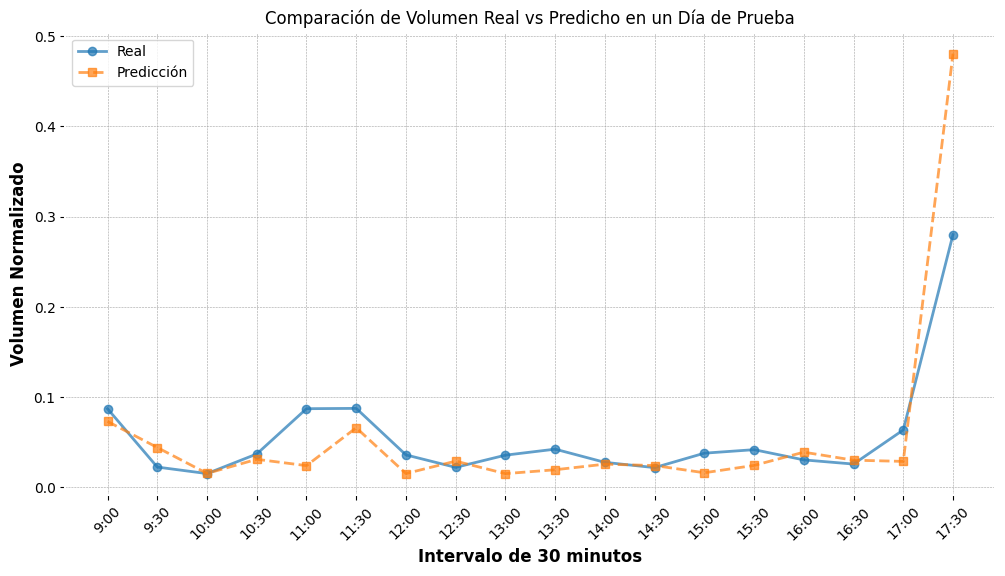

In [ ]:
# Seleccionar un día de prueba para comparar predicciones vs valores reales
sample_index = 0  # Tomamos el primer día del conjunto de prueba
real_values = y_test[sample_index]
predicted_values = y_pred[sample_index]

# Definir intervalos de 30 minutos
bins = np.arange(9, 18, 0.5)  # Mercado abierto de 9:00 a 17:30
labels = [f"{int(h)}:{int((h%1)*60):02d}" for h in bins]

# Graficar los valores reales vs predichos
plt.figure(figsize=(12, 6))
plt.plot(labels, real_values, marker='o', linestyle='-', label="Real", alpha=0.7)
plt.plot(labels, predicted_values, marker='s', linestyle='--', label="Predicción", alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel("Intervalo de 30 minutos")
plt.ylabel("Volumen Normalizado")
plt.title("Comparación de Volumen Real vs Predicho en un Día de Prueba")
plt.legend()
plt.grid(True)
plt.show()


#### Segundo modelo (Volatilidad/tendencia 5 días)

En esta segunda iteración, hemos incorporado nuevas características:  

- **Volatilidad a 5 días**: Calculada como la desviación estándar de los últimos cinco días.  
- **Tendencia a 5 días**: Definida como la media móvil (*rolling mean*) en ese mismo periodo.  

A partir de estas variables, hemos introducido el siguiente ratio:

$$
Ratio_{5d}= \frac{Volatilidad_{5d}}{Tendencia_{5d}}
$$

Este indicador nos permite interpretar la estabilidad del volumen:  

- Si $ Ratio_{5d} > 1 $, la volatilidad es mayor que la media, lo que sugiere un volumen inestable.  
- Si $ Ratio_{5d} < 1 $, el volumen tiende a ser más homogéneo y estable.  

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Mantener la fecha como columna para luego pivotear
df_volumen = df_volumen.reset_index()
df_volumen["fecha"] = df_volumen["TIME"].dt.date  # Extraer la fecha
df_volumen["hora"] = df_volumen["TIME"].dt.time  # Extraer la hora

# Pivotear los datos para que cada fila sea un día y las columnas sean los intervalos de 30 minutos
df_volumen_pivot = df_volumen.pivot(index="fecha", columns="hora", values="VOLUMEN")

# Normalizar por el volumen total diario
df_volumen_pivot = df_volumen_pivot.div(df_volumen_pivot.sum(axis=1), axis=0)

# Volatilidad: Desviación estándar del volumen total de los últimos 5 días
df_volumen_total_diario = df_volumen.groupby("fecha")["VOLUMEN"].sum()
df_volumen_pivot["volatilidad_5d"] = df_volumen_total_diario.rolling(window=5).std()

# Tendencia del volumen acumulado: Media móvil de los últimos 5 días
df_volumen_pivot["tendencia_volumen_5d"] = df_volumen_total_diario.rolling(window=5).mean()

df_volumen_pivot["ratio_5d"] = df_volumen_pivot["volatilidad_5d"] / df_volumen_pivot["tendencia_volumen_5d"]


In [ ]:
# Asegurar que las columnas están en formato string
df_volumen_pivot.columns = df_volumen_pivot.columns.astype(str)

# Separar las columnas de volatilidad y tendencia
columnas_extra = ["ratio_5d"]
columnas_presentes = [col for col in columnas_extra if col in df_volumen_pivot.columns]

# Filtrar las columnas de horas junto con las columnas adicionales
columnas_horas = [col for col in df_volumen_pivot.columns if '09:00:00' <= col <= '17:30:00']
df_volumen_pivot = df_volumen_pivot.loc[:, columnas_horas + columnas_presentes]

# Mostrar las primeras filas del DataFrame filtrado
#df_volumen_pivot

hora,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00,ratio_5d
fecha,,,,,,,,,,,,,,,,,,,
2018-01-02,0.085968,0.054624,0.047574,0.095950,0.043250,0.027563,0.032198,0.027694,0.023650,0.024478,0.025658,0.025852,0.026526,0.035058,0.043921,0.026844,0.064639,0.288555,NaN
2018-01-03,0.082028,0.044532,0.030307,0.037557,0.033703,0.035042,0.029274,0.030403,0.018098,0.024383,0.029424,0.034491,0.032597,0.038943,0.061266,0.080573,0.058967,0.298413,NaN
2018-01-04,0.051438,0.040564,0.058130,0.045478,0.023451,0.024406,0.025551,0.015434,0.032377,0.016236,0.041181,0.026439,0.022235,0.027681,0.035240,0.065258,0.106136,0.342766,NaN
2018-01-05,0.099842,0.058559,0.159463,0.057255,0.038026,0.063705,0.030521,0.018886,0.037588,0.013306,0.010468,0.015820,0.019185,0.024900,0.041730,0.025650,0.042106,0.242992,NaN
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.610594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,0.084350,0.030858,0.040930,0.024178,0.032980,0.028057,0.018701,0.025896,0.028332,0.019155,0.047835,0.047825,0.032615,0.028952,0.050740,0.072600,0.061988,0.324010,1.765604
2018-12-28,0.076017,0.052703,0.039680,0.059999,0.056353,0.065996,0.042602,0.046879,0.031021,0.024253,0.032290,0.022089,0.015721,0.040220,0.038851,0.035659,0.053867,0.265802,1.159378
2018-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.403422


In [ ]:
df_volumen_pivot.dropna(inplace=True)
#df_volumen_pivot

hora,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00,ratio_5d
fecha,,,,,,,,,,,,,,,,,,,
2018-01-08,0.064182,0.043945,0.083818,0.065564,0.038481,0.030035,0.026192,0.032968,0.028098,0.060219,0.033933,0.022046,0.025019,0.029807,0.044366,0.026017,0.046243,0.299068,0.968569
2018-01-09,0.096486,0.059199,0.066316,0.028327,0.014699,0.020766,0.025168,0.032901,0.025859,0.017018,0.016442,0.026262,0.028791,0.045768,0.047740,0.030272,0.038794,0.379194,0.954104
2018-01-10,0.060387,0.070974,0.055309,0.077843,0.034154,0.039511,0.026259,0.030730,0.041691,0.024742,0.050110,0.051691,0.033223,0.044981,0.048366,0.040562,0.041169,0.228297,1.053531
2018-01-11,0.103166,0.052555,0.023243,0.020817,0.025295,0.017325,0.018079,0.023697,0.020425,0.078436,0.057532,0.038444,0.065105,0.074030,0.042441,0.046184,0.033186,0.260039,0.708880
2018-01-12,0.080863,0.056109,0.042019,0.023083,0.033594,0.043523,0.025741,0.023785,0.018490,0.024761,0.015187,0.053313,0.050717,0.063214,0.025233,0.045768,0.057081,0.317518,0.361570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.102303,0.055265,0.036304,0.020448,0.019846,0.023824,0.020890,0.019707,0.024353,0.024204,0.018053,0.023686,0.047028,0.031398,0.035991,0.039099,0.058440,0.399164,0.581276
2018-12-21,0.027131,0.016963,0.022486,0.018062,0.027805,0.239626,0.034346,0.022899,0.022575,0.012686,0.009836,0.013520,0.008322,0.014140,0.034894,0.034958,0.035911,0.403840,0.447764
2018-12-24,0.193698,0.075645,0.063541,0.035410,0.037170,0.056412,0.051987,0.072921,0.084000,0.079826,0.249391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.307119


In [ ]:
# Crear las características y el target
X, y = [], []
for i in range(5, len(df_volumen_pivot)):
    X.append(df_volumen_pivot.iloc[i-5:i].values.flatten())  # Últimos 5 días
    y.append(df_volumen_pivot.iloc[i].values)  # Día siguiente

X = np.array(X)
y = np.array(y)

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # shuffle=False -> división cronológica

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE del regresor logístico 2: ", mae)
print("MSE del regresor logístico 2: ", mse)

(0.03083552778081996, 0.004617909565455969)

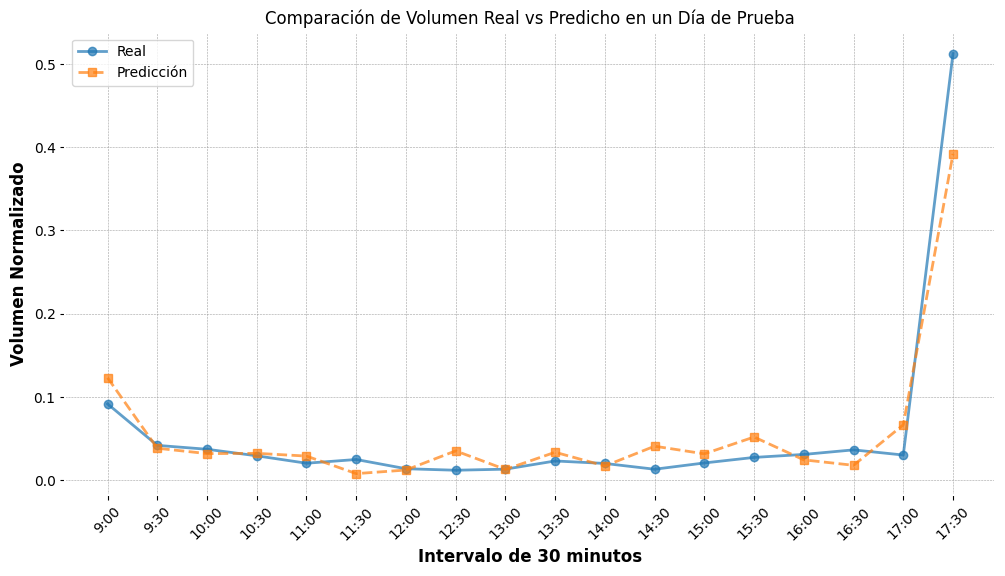

In [ ]:
# Seleccionar un día de prueba para comparar predicciones vs valores reales
sample_index = 2  # Tomamos el primer día del conjunto de prueba
real_values = y_test[sample_index][:-1]
predicted_values = y_pred[sample_index][:-1]

# Definir intervalos de 30 minutos
bins = np.arange(9, 18, 0.5)  # Mercado abierto de 9:00 a 17:30
labels = [f"{int(h)}:{int((h%1)*60):02d}" for h in bins]

# Graficar los valores reales vs predichos
plt.figure(figsize=(12, 6))
plt.plot(labels, real_values, marker='o', linestyle='-', label="Real", alpha=0.7)
plt.plot(labels, predicted_values, marker='s', linestyle='--', label="Predicción", alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel("Intervalo de 30 minutos")
plt.ylabel("Volumen Normalizado")
plt.title("Comparación de Volumen Real vs Predicho en un Día de Prueba")
plt.legend()
plt.grid(True)
plt.show()


#### Tercer modelo (Random Forest)

En esta tercera iteración, hemos probado un **Random Forest Regressor**. 

A diferencia de la regresión logística utilizada en la primera iteración, que asume una relación lineal entre las características y la variable objetivo, Random Forest es capaz de modelar patrones complejos y relaciones no lineales en los datos, lo cual es crucial en series temporales financieras donde las variaciones del volumen pueden depender de interacciones no triviales entre diferentes factores. 

Otra ventaja importante de este modelo es que puede manejar automáticamente la relevancia de las características, asignando mayor peso a aquellas que realmente contribuyen a la predicción y descartando las menos informativas.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE del regresor Random Forest: ", mae)
print("MSE del regresor Random Forest: ", mse)

(0.01754289301442116, 0.0017450546723642702)

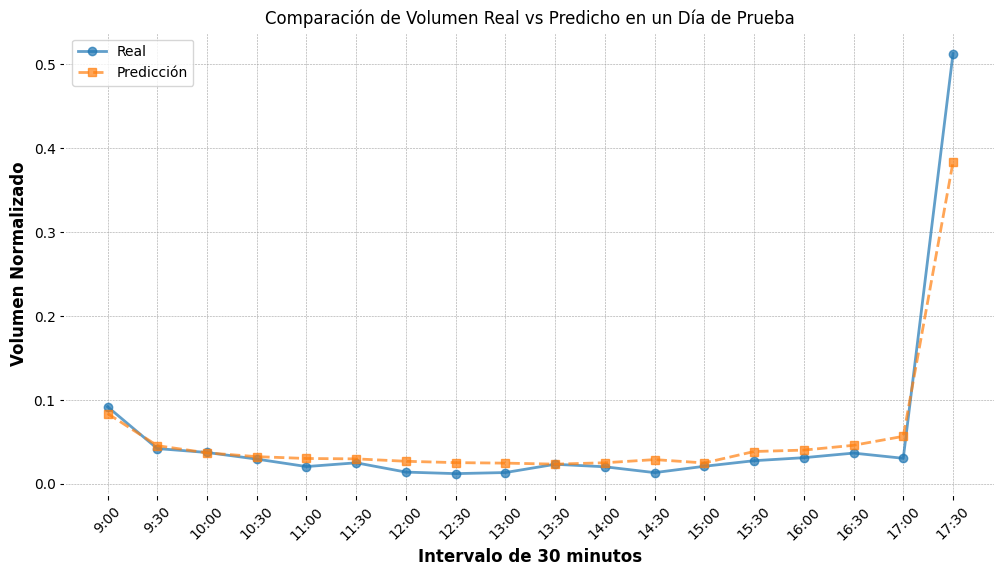

In [ ]:
# Seleccionar un día de prueba para comparar predicciones vs valores reales
sample_index = 2  # Tomamos el primer día del conjunto de prueba
real_values = y_test[sample_index][:-1]
predicted_values = y_pred[sample_index][:-1]

# Definir intervalos de 30 minutos
bins = np.arange(9, 18, 0.5)  # Mercado abierto de 9:00 a 17:30
labels = [f"{int(h)}:{int((h%1)*60):02d}" for h in bins]

# Graficar los valores reales vs predichos
plt.figure(figsize=(12, 6))
plt.plot(labels, real_values, marker='o', linestyle='-', label="Real", alpha=0.7)
plt.plot(labels, predicted_values, marker='s', linestyle='--', label="Predicción", alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel("Intervalo de 30 minutos")
plt.ylabel("Volumen Normalizado")
plt.title("Comparación de Volumen Real vs Predicho en un Día de Prueba")
plt.legend()
plt.grid(True)
plt.show()


Como se puede ver, el regresor Random Forest es el que mejor se ajusta al volumen normalizado real.

## 3. Optimización de Carteras

Utilizando los datos del IBEX 35 disponibles en IBEX.csv, que contienen los precios
de cierre de todos los activos que formaron parte del  ́ındice durante el periodo 2003-2022,
realizaremos los siguientes algoritmos:


#### **1. Ponderación Equitativa (Equally Weighted).**


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos de IBEX 35 y IBEX con Dividendos
ibex_data = pd.read_csv("C:/Users/LUCIA/Documents/IA EN FINANZAS/IAA-Finance/Labs/Lab 2/data/IBEX.csv", index_col=0, parse_dates=True)
ibex_div_data = pd.read_csv("C:/Users/LUCIA/Documents/IA EN FINANZAS/IAA-Finance/Labs/Lab 2/data/IBEX_div.csv", index_col=0, parse_dates=True)

# Verificar las primeras filas de los datos
ibex_data.head(), ibex_div_data.head()


(                 SAN  BTO_1  BKIA_0  BKIA      NTGY  TRE     ACX_0  ACX  FER  \
 2003-07-30  2.404816    NaN     NaN   NaN  5.879236  NaN  5.074736  NaN  NaN   
 2003-07-31  2.404816    NaN     NaN   NaN  5.924461  NaN  5.109555  NaN  NaN   
 2003-08-01  2.404816    NaN     NaN   NaN  5.924461  NaN  5.074736  NaN  NaN   
 2003-08-04  2.404816    NaN     NaN   NaN  5.856624  NaN  5.074736  NaN  NaN   
 2003-08-05  2.404816    NaN     NaN   NaN  5.856624  NaN  5.031214  NaN  NaN   
 
                  ACS  ...   TEM  CAR  AGS  COL_0  A3TV    SGC  PHM  SLR  FDR  \
 2003-07-30  5.246506  ...  6.57  NaN  NaN    NaN   NaN  19.78  NaN  NaN  NaN   
 2003-07-31  5.283715  ...  6.54  NaN  NaN    NaN   NaN  19.96  NaN  NaN  NaN   
 2003-08-01  5.246506  ...  6.52  NaN  NaN    NaN   NaN  20.05  NaN  NaN  NaN   
 2003-08-04  5.276273  ...  6.49  NaN  NaN    NaN   NaN  19.76  NaN  NaN  NaN   
 2003-08-05  5.268831  ...  6.52  NaN  NaN    NaN   NaN  19.82  NaN  NaN  NaN   
 
             ROVI  
 200

In [12]:
# Limpiar los datos eliminando columnas con demasiados valores nulos
ibex_data_cleaned = ibex_data.copy() 

# Calcular los retornos diarios de cada activo
returns = ibex_data_cleaned.pct_change()

# Crear un DataFrame vacío para almacenar los pesos con rebalanceo
weights = pd.DataFrame(index=returns.index, columns=returns.columns, dtype=float)

# Determinar los días en los que se hará el rebalanceo (cada 10 días)
rebalance_days = returns.index[::10]  # Tomamos cada décimo día

# Asignar pesos equitativos solo en los días de rebalanceo y mantenerlos hasta el siguiente rebalanceo
previous_weights = None

for i in range(len(returns)):
    date = returns.index[i]

    if date in rebalance_days:  # Si es un día de rebalanceo
        available_assets = returns.loc[date].notna()  # Activos con datos
        num_assets = available_assets.sum()  # Número de activos disponibles

        if num_assets > 0:
            previous_weights = available_assets / num_assets  # Asignar pesos equitativos
        else:
            previous_weights = pd.Series(0, index=returns.columns)  # No hay activos disponibles

    # Aplicar los pesos previos (mantiene los mismos durante 10 días hasta el siguiente rebalanceo)
    weights.loc[date] = previous_weights

# Calcular los retornos de la cartera aplicando los pesos con rebalanceo
portfolio_returns = (returns * weights).sum(axis=1)

# Calcular la rentabilidad acumulada correctamente
equal_weighted_cum = (1 + portfolio_returns).cumprod()

# Calcular la rentabilidad acumulada del IBEX con Dividendos correctamente
ibex_div_cum = (1 + ibex_div_data.pct_change()).cumprod()

C:\Users\LUCIA\AppData\Local\Temp\ipykernel_9068\1391623138.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = ibex_data_cleaned.pct_change()


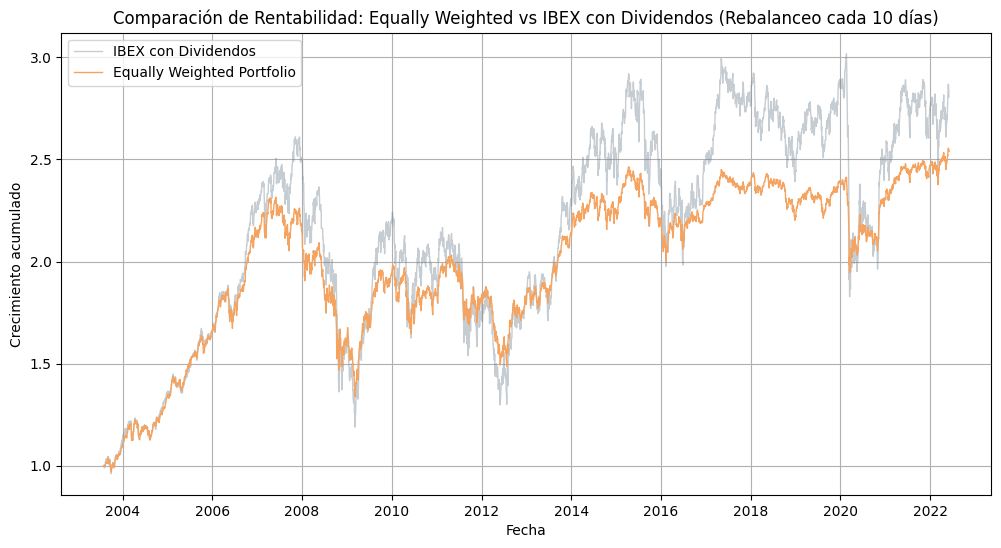

In [13]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(ibex_div_cum, label="IBEX con Dividendos", linestyle="-", color="slategray", linewidth=1, alpha=0.4)
plt.plot(equal_weighted_cum, label="Equally Weighted Portfolio", linestyle="-", color="sandybrown", linewidth=1)

plt.legend()
plt.title("Comparación de Rentabilidad: Equally Weighted vs IBEX con Dividendos (Rebalanceo cada 10 días)")
plt.xlabel("Fecha")
plt.ylabel("Crecimiento acumulado")
plt.grid(True)
plt.show()

#### **2. Ponderación por Volatilidad Inversa.**


In [14]:
# Definir la ventana para calcular la volatilidad (60 días)
volatility_window = 60

# Calcular la volatilidad móvil de cada activo (desviación estándar de los retornos)
rolling_volatility = returns.rolling(window=volatility_window).std()

# Crear un DataFrame vacío para almacenar los pesos con rebalanceo cada 10 días
weights_vol_inv = pd.DataFrame(index=returns.index, columns=returns.columns, dtype=float)

# Determinar los días en los que se hará el rebalanceo (cada 10 días)
rebalance_days = returns.index[::10]  # Tomamos cada décimo día

# Asignar pesos por volatilidad inversa en los días de rebalanceo y mantenerlos constantes hasta el siguiente rebalanceo
previous_weights = None

for i in range(len(returns)):
    date = returns.index[i]

    if date in rebalance_days:  # Si es un día de rebalanceo
        available_volatility = rolling_volatility.loc[date]  # Volatilidad de los activos en esa fecha

        # Filtrar solo los activos que tienen datos y evitar dividir por cero
        available_volatility = available_volatility.dropna().replace(0, np.nan)

        if not available_volatility.empty:
            inv_volatility = 1 / available_volatility  # Invertir la volatilidad
            previous_weights = inv_volatility / inv_volatility.sum()  # Normalizar para que sumen 1
        else:
            previous_weights = pd.Series(0, index=returns.columns)  # No hay activos disponibles

    # Aplicar los pesos previos (mantiene los mismos durante 10 días hasta el siguiente rebalanceo)
    weights_vol_inv.loc[date] = previous_weights

# Calcular los retornos de la cartera aplicando los pesos con volatilidad inversa
portfolio_returns_vol_inv = (returns * weights_vol_inv).sum(axis=1)

# Calcular la rentabilidad acumulada correctamente
vol_inv_cum = (1 + portfolio_returns_vol_inv).cumprod()

# Calcular la rentabilidad acumulada del IBEX con Dividendos correctamente
ibex_div_cum = (1 + ibex_div_data.pct_change()).cumprod()

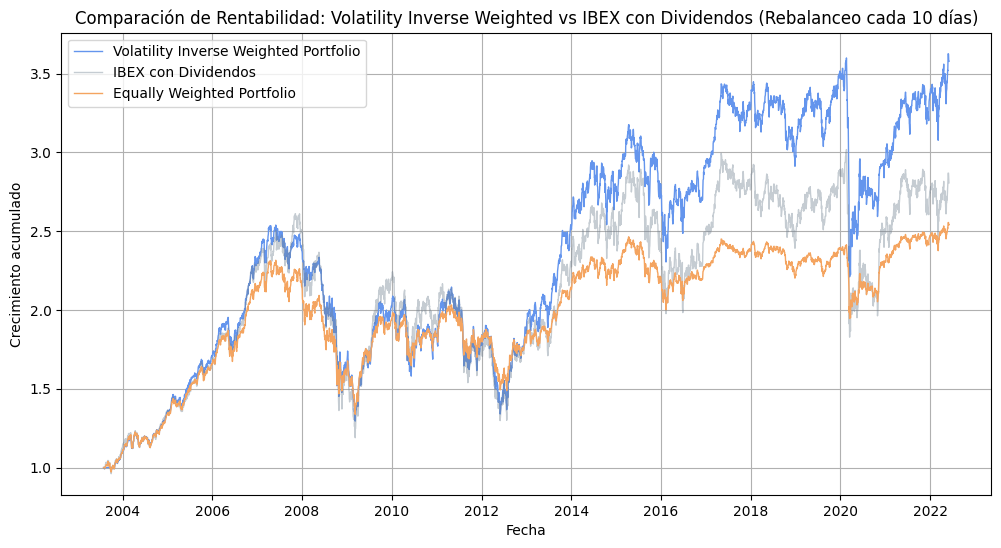

In [15]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(vol_inv_cum, label="Volatility Inverse Weighted Portfolio", linestyle="-", color="cornflowerblue", linewidth=1)
plt.plot(ibex_div_cum, label="IBEX con Dividendos", linestyle="-", color="slategray", linewidth=1, alpha=0.4)
plt.plot(equal_weighted_cum, label="Equally Weighted Portfolio", linestyle="-", color="sandybrown", linewidth=1)

plt.legend()
plt.title("Comparación de Rentabilidad: Volatility Inverse Weighted vs IBEX con Dividendos (Rebalanceo cada 10 días)")
plt.xlabel("Fecha")
plt.ylabel("Crecimiento acumulado")
plt.grid(True)
plt.show()

#### **3. Optimización mediante la Teoría Moderna de Carteras (Modern Portfolio Theory).**


In [66]:

# Calcular los retornos diarios
returns = ibex_data.pct_change()
rolling_window = 60  # Ventana para volatilidad
volatility = returns.rolling(rolling_window).std()

# Definir los días de rebalanceo cada 10 días
rebalance_days = returns.index[::10]

# Función para optimizar la cartera de mínima varianza global
def global_min_variance(cov_matrix):
    n = len(cov_matrix)

    # Función objetivo: w^T Sigma w
    def objective(w):
        return w.T @ cov_matrix @ w

    # Restricción 1: sum(w) = 1
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(n)]

    # Punto inicial (ej: dividir capital igual)
    x0 = np.full(n, 1/n)

    result = minimize(objective, x0=x0, bounds=bounds, constraints=constraints)

    if not result.success:
        # Si no converge, devolvemos algo neutral
        return np.full(n, 1/n)
    return result.x

# Crear DataFrame para almacenar los pesos con rebalanceo cada 10 días
weights_mpt = pd.DataFrame(index=returns.index, columns=returns.columns, dtype=float)

# Inicialización de los pesos previos
previous_weights = pd.Series(1 / len(returns.columns), index=returns.columns)

# Aplicar el rebalanceo
for i in range(len(returns)):
    date = returns.index[i]

    if date in rebalance_days:
        if i < rolling_window:
            # Hasta que no tengamos datos suficientes, asignamos peso nulo
            previous_weights = pd.Series(0.0, index=returns.columns)
        else:
            # Seleccionar ventana de datos previos
            windowed_returns = returns.iloc[i - rolling_window : i].dropna(axis=1, how='any')

            if len(windowed_returns.columns) > 0:
                # Calcular matriz de covarianza
                cov_matrix = windowed_returns.cov().values

                # Optimizar los pesos con mínima varianza
                opt_weights = global_min_variance(cov_matrix)

                # Asignar los pesos optimizados a los activos presentes en la ventana
                new_weights = pd.Series(0.0, index=returns.columns)
                new_weights.loc[windowed_returns.columns] = opt_weights

                previous_weights = new_weights

    weights_mpt.loc[date] = previous_weights

# Calcular los retornos de la cartera optimizada
portfolio_returns_mpt = (returns * weights_mpt).sum(axis=1)

# Calcular la rentabilidad acumulada correctamente
mpt_cum = (1 + portfolio_returns_mpt).cumprod()
ibex_div_cum = (1 + ibex_div_data.pct_change()).cumprod()

C:\Users\LUCIA\AppData\Local\Temp\ipykernel_9068\814981700.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = ibex_data.pct_change()


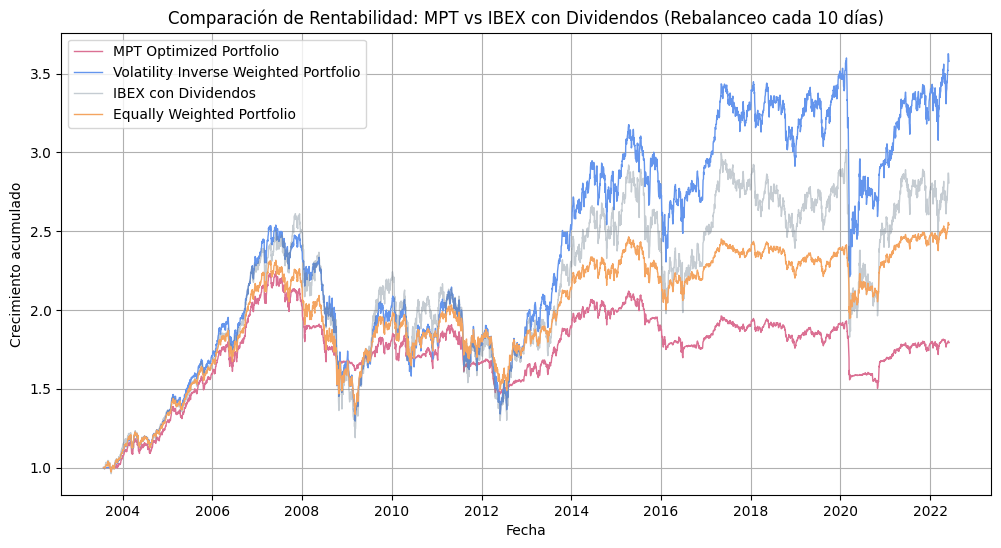

In [67]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(mpt_cum, label="MPT Optimized Portfolio", linestyle="-", color="palevioletred", linewidth=1)
plt.plot(vol_inv_cum, label="Volatility Inverse Weighted Portfolio", linestyle="-", color="cornflowerblue", linewidth=1)
plt.plot(ibex_div_cum, label="IBEX con Dividendos", linestyle="-", color="slategray", linewidth=1, alpha=0.4)
plt.plot(equal_weighted_cum, label="Equally Weighted Portfolio", linestyle="-", color="sandybrown", linewidth=1)

plt.legend()
plt.title("Comparación de Rentabilidad: MPT vs IBEX con Dividendos (Rebalanceo cada 10 días)")
plt.xlabel("Fecha")
plt.ylabel("Crecimiento acumulado")
plt.grid(True)
plt.show()

#### **4. Optimización mediante Hierarchical Risk Parity (HRP).**


In [ ]:
# Reimportar librerías tras el reinicio del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Función para calcular la distancia basada en correlación
def correl_dist(corr_matrix):
    return np.sqrt((1 - corr_matrix) / 2)

# Función para obtener el orden de Quasi-Diagonalización
def get_quasi_diag(link):
    link = link.astype(int)
    sort_ix = pd.Series([link[-1, 0], link[-1, 1]])
    num_items = link[-1, 3]

    while sort_ix.max() >= num_items:
        sort_ix.index = range(0, sort_ix.shape[0] * 2, 2)
        df0 = sort_ix[sort_ix >= num_items]
        i = df0.index
        j = df0.values - num_items
        sort_ix[i] = link[j, 0]
        df0 = pd.Series(link[j, 1], index=i + 1)
        sort_ix = sort_ix.append(df0)
        sort_ix = sort_ix.sort_index()
        sort_ix.index = range(sort_ix.shape[0])

    return sort_ix.tolist()

# Función para calcular la varianza de un cluster
def get_cluster_var(cov_matrix, c_items):
    cov_subset = cov_matrix.loc[c_items, c_items]
    w_ = get_ivp(cov_subset).reshape(-1, 1)
    return np.dot(np.dot(w_.T, cov_subset), w_)[0, 0]

# Función para calcular la cartera de varianza inversa
def get_ivp(cov_matrix):
    ivp = 1. / np.diag(cov_matrix)
    ivp /= ivp.sum()
    return ivp

# Función para aplicar Recursive Bisection y asignar pesos
def get_rec_bipart(cov_matrix, sort_ix):
    w = pd.Series(1, index=sort_ix)
    clusters = [sort_ix]

    while len(clusters) > 0:
        clusters = [
            i[j:k]
            for i in clusters
            for j, k in ((0, len(i) // 2), (len(i) // 2, len(i)))
            if len(i) > 1
        ]

        for i in range(0, len(clusters), 2):
            cluster_0 = clusters[i]
            cluster_1 = clusters[i + 1]
            var_0 = get_cluster_var(cov_matrix, cluster_0)
            var_1 = get_cluster_var(cov_matrix, cluster_1)
            alpha = 1 - var_0 / (var_0 + var_1)
            w[cluster_0] *= alpha
            w[cluster_1] *= 1 - alpha

    return w

# Función principal para calcular los pesos con HRP
def hierarchical_risk_parity(cov_matrix, corr_matrix):
    dist_matrix = correl_dist(corr_matrix)
    linkage = sch.linkage(dist_matrix, method='single')
    sort_ix = get_quasi_diag(linkage)
    sort_ix = corr_matrix.index[sort_ix].tolist()
    return get_rec_bipart(cov_matrix, sort_ix)

In [ ]:
# Calcular los retornos sin eliminar NaNs
returns = ibex_data.pct_change()
ibex_div_returns = ibex_div_data.pct_change()

# Definir los días de rebalanceo cada 10 días
rebalance_days = returns.index[::10]

# Crear DataFrame para almacenar los pesos de HRP con rebalanceo cada 10 días
weights_hrp = pd.DataFrame(index=returns.index, columns=returns.columns, dtype=float)

previous_weights = None

for i in range(len(returns)):
    date = returns.index[i]

    if date in rebalance_days:
        cov_matrix = returns.loc[:date].cov()
        corr_matrix = returns.loc[:date].corr()

        # Verificar si las matrices tienen valores válidos
        if cov_matrix.isnull().values.any() or corr_matrix.isnull().values.any():
            previous_weights = pd.Series(1 / len(returns.columns), index=returns.columns)
        else:
            previous_weights = hierarchical_risk_parity(cov_matrix, corr_matrix)

    weights_hrp.loc[date] = previous_weights

# Calcular los retornos de la cartera aplicando los pesos de HRP
portfolio_returns_hrp = (returns * weights_hrp).sum(axis=1)

# Calcular la rentabilidad acumulada correctamente
hrp_cum = (1 + portfolio_returns_hrp).cumprod()
ibex_div_cum = (1 + ibex_div_returns).cumprod()

# Mostrar tabla con retornos y pesos finales
final_weights_hrp = pd.DataFrame(previous_weights, columns=["Final Weights"])

C:\Users\LUCIA\AppData\Local\Temp\ipykernel_9068\272577574.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = ibex_data.pct_change()


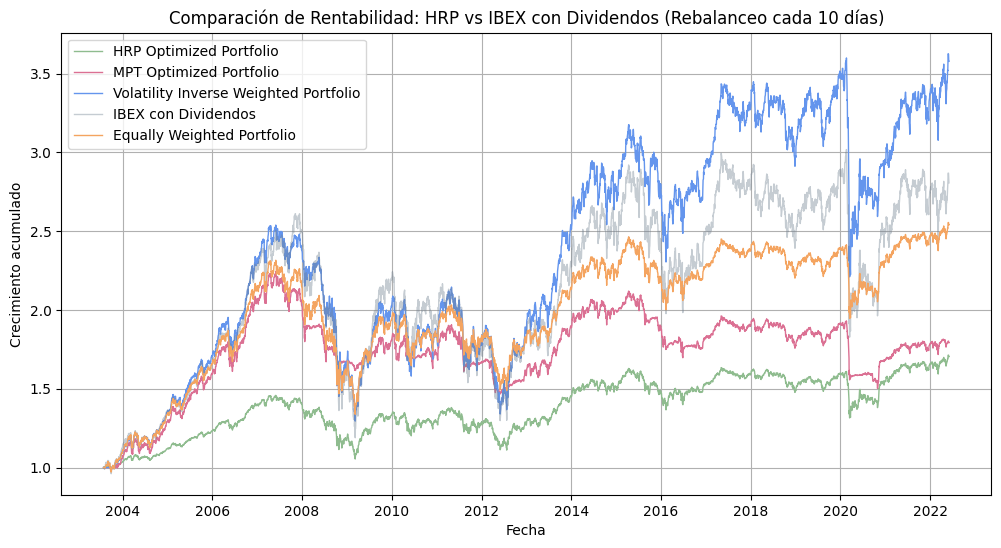

In [76]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(hrp_cum, label="HRP Optimized Portfolio", linestyle="-", color="darkseagreen", linewidth=1)
plt.plot(mpt_cum, label="MPT Optimized Portfolio", linestyle="-", color="palevioletred", linewidth=1)
plt.plot(vol_inv_cum, label="Volatility Inverse Weighted Portfolio", linestyle="-", color="cornflowerblue", linewidth=1)
plt.plot(ibex_div_cum, label="IBEX con Dividendos", linestyle="-", color="slategrey", linewidth=1, alpha=0.4)
plt.plot(equal_weighted_cum, label="Equally Weighted Portfolio", linestyle="-", color="sandybrown", linewidth=1)

plt.legend()
plt.title("Comparación de Rentabilidad: HRP vs IBEX con Dividendos (Rebalanceo cada 10 días)")
plt.xlabel("Fecha")
plt.ylabel("Crecimiento acumulado")
plt.grid(True)
plt.show()